In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import optimizers

In [2]:
tf.random.set_seed(42)
np.random.seed(1337)

In [3]:
keras.__version__

'2.6.0'

In [17]:
df_drop = pd.read_csv("df_drop.csv")

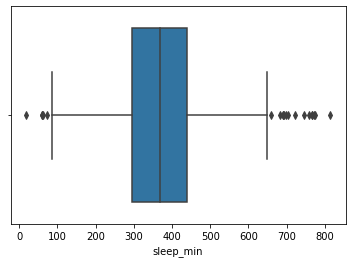

In [18]:
import seaborn as sns
sns.boxplot(x=df_drop['sleep_min'])

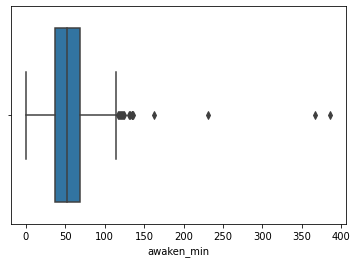

In [19]:
import seaborn as sns
sns.boxplot(x=df_drop['awaken_min'])

In [20]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_drop))
print(z)

[[1.74012957 1.72246246 1.69872995 ... 0.34019989 1.8240105  1.43189043]
 [1.73816295 1.72246246 1.69872995 ... 0.11791281 1.8240105  2.05897856]
 [1.73619632 1.72246246 1.69872995 ... 0.03659858 0.4659083  0.43145716]
 ...
 [1.72309878 1.69689762 0.21658009 ... 0.70705148 0.4659083  0.43145716]
 [1.72506541 1.69689762 0.21658009 ... 0.86608074 0.4659083  0.43145716]
 [1.72703203 1.69689762 0.21658009 ... 0.44681423 0.4659083  0.43145716]]


In [21]:
threshold = 3
print(np.where(z > 3))

(array([  36,   38,   38,   38,   40,   42,   45,   45,   52,   65,   65,
         66,   66,   67,   67,   75,   75,   82,  122,  127,  134,  290,
        298,  298,  326,  326,  337,  337,  346,  349,  351,  360,  370,
        370,  381,  412,  426,  431,  432,  432,  453,  459,  459,  460,
        478,  478,  486,  522,  522,  522,  522,  523,  523,  535,  535,
        538,  538,  574,  593,  593,  593,  593,  601,  601,  601,  623,
        636,  644,  644,  671,  673,  674,  693,  693,  693,  693,  696,
        701,  701,  704,  705,  705,  706,  706,  707,  707,  707,  759,
        764,  764,  768,  768,  777,  779,  779,  783,  784,  784,  790,
        813,  827,  827,  853,  853,  854,  854,  854,  854,  855,  855,
        871,  872,  893,  895,  903,  904,  904,  917,  928,  928,  930,
        963,  963,  982,  996, 1014, 1020, 1039, 1039, 1040, 1049, 1049,
       1054, 1065, 1065, 1068, 1069, 1069, 1077, 1081, 1087, 1087, 1087,
       1091, 1091, 1092, 1098, 1098, 1098, 1102, 1

In [22]:
df_drop = df_drop[(z < 3).all(axis=1)]

In [23]:
df_drop.reset_index(inplace = True)

In [24]:
df_drop.shape

(1519, 22)

In [25]:
df_drop.corr(method='pearson')['sleep_min'].sort_values()

sleep_start_time   -0.487842
nap_total_time     -0.130330
nap_total_freq     -0.127308
bmi                -0.082049
userId             -0.053954
index              -0.053244
Unnamed: 0         -0.053232
date               -0.041566
cal_consume        -0.011042
stairs             -0.005411
isi                 0.021673
month               0.024477
active_cal          0.027782
age                 0.049477
distance            0.063738
walks               0.067660
active_ratio        0.078119
sleep_efficiency    0.081786
awaken_moments      0.459506
sleep_end_time      0.491209
awaken_min          0.543898
sleep_min           1.000000
Name: sleep_min, dtype: float64

In [26]:
df_drop.drop(['index', 'Unnamed: 0', 'sleep_start_time'], axis=1, inplace=True)
df_drop.head()

,userId,bmi,isi,age,month,date,sleep_end_time,sleep_min,sleep_efficiency,awaken_min,awaken_moments,cal_consume,active_cal,walks,distance,stairs,active_ratio,nap_total_freq,nap_total_time
0,1,16.2,17,20,4,23,1852.0,216.0,0.9191,19.0,21.0,1719,700,11975,8.85,12,0.2809,1.0,104.0
1,1,16.2,17,20,4,24,2170.0,287.0,0.8516,50.0,20.0,1761,755,11712,8.05,19,0.2302,1.0,139.0
2,1,16.2,17,20,4,25,2003.0,413.0,0.8658,64.0,28.0,1850,868,12898,8.72,8,0.2473,0.0,0.0
3,1,16.2,17,20,4,26,1941.0,293.0,0.8420,55.0,26.0,1795,805,12306,8.25,20,0.2749,0.0,0.0
4,1,16.2,17,20,4,27,1912.0,329.0,0.8658,51.0,27.0,1848,894,9207,6.16,15,0.2891,0.0,0.0


In [31]:
grouped = df_drop.groupby('userId')
train_df = pd.DataFrame()
val_df = pd.DataFrame()
test_df = pd.DataFrame()
for name, group in grouped:
    print(name)
    print(group)
    if name == 1 or name == 3:
      val_df = pd.concat([val_df,group])
    elif name == 12:
      test_df = pd.concat([test_df,group])
    else:
      train_df = pd.concat([train_df,group])

1
    userId   bmi  isi  ...  active_ratio  nap_total_freq  nap_total_time
0        1  16.2   17  ...        0.2809             1.0           104.0
1        1  16.2   17  ...        0.2302             1.0           139.0
2        1  16.2   17  ...        0.2473             0.0             0.0
3        1  16.2   17  ...        0.2749             0.0             0.0
4        1  16.2   17  ...        0.2891             0.0             0.0
5        1  16.2   17  ...        0.3648             0.0             0.0
6        1  16.2   17  ...        0.1630             1.0            62.0
7        1  16.2   17  ...        0.2146             0.0             0.0
8        1  16.2   17  ...        0.2041             0.0             0.0
9        1  16.2   17  ...        0.2327             0.0             0.0
10       1  16.2   17  ...        0.1954             1.0           101.0
11       1  16.2   17  ...        0.2632             0.0             0.0
12       1  16.2   17  ...        0.2026         

In [32]:
train_df.reset_index(inplace = True)
val_df.reset_index(inplace = True)
test_df.reset_index(inplace = True)

In [35]:
print(train_df)

      index  userId    bmi  ...  active_ratio  nap_total_freq  nap_total_time
0        36       2  25.62  ...        0.3330             1.0            88.0
1        37       2  25.62  ...        0.2382             0.0             0.0
2        38       2  25.62  ...        0.1138             0.0             0.0
3        39       2  25.62  ...        0.2158             0.0             0.0
4        40       2  25.62  ...        0.2251             0.0             0.0
...     ...     ...    ...  ...           ...             ...             ...
1402   1514      50  21.23  ...        0.2904             0.0             0.0
1403   1515      50  21.23  ...        0.2804             0.0             0.0
1404   1516      50  21.23  ...        0.3215             0.0             0.0
1405   1517      50  21.23  ...        0.3391             0.0             0.0
1406   1518      50  21.23  ...        0.1938             0.0             0.0

[1407 rows x 20 columns]


In [37]:
train_df.loc[0,'awaken_min']

18.0

In [45]:
def mov_avg(df):
    final_df = pd.DataFrame()
    grouped = df.groupby('userId')
    for name, df_drop in grouped:
        df_drop.reset_index(inplace=True)
        for i in range(1, len(df_drop)):
            df_drop.loc[i, 'awaken_min'] = (df_drop.loc[i-1, 'awaken_min']*i + df_drop.loc[i, 'awaken_min'])/(i+1)
        for i in range(1, len(df_drop)):
            df_drop.loc[i, 'awaken_moments'] = (df_drop.loc[i-1, 'awaken_moments']*i + df_drop.loc[i, 'awaken_moments'])/(i+1)
        for i in range(len(df_drop)-1,0,-1):
            df_drop.loc[i, 'awaken_min'] = df_drop.loc[i-1, 'awaken_min']
        for i in range(len(df_drop)-1,0,-1):
            df_drop.loc[i, 'awaken_moments'] = df_drop.loc[i-1, 'awaken_moments']

        for i in range(1, len(df_drop)):
            df_drop.loc[i, 'sleep_efficiency'] = (df_drop.loc[i-1, 'sleep_efficiency']*i + df_drop.loc[i, 'sleep_efficiency'])/(i+1)
        for i in range(len(df_drop)-1,0,-1):
            df_drop.loc[i, 'sleep_efficiency'] = df_drop.loc[i-1, 'sleep_efficiency']
                
        final_df = pd.concat([final_df,df_drop])
    return final_df

In [46]:
train_df = mov_avg(train_df)
val_df = mov_avg(val_df)
test_df = mov_avg(test_df)

In [53]:
train_df.head()

,level_0,index,userId,bmi,isi,age,month,date,sleep_end_time,sleep_min,sleep_efficiency,awaken_min,awaken_moments,cal_consume,active_cal,walks,distance,stairs,active_ratio,nap_total_freq,nap_total_time
0,0,36,2,25.62,18,23,4,24,1918.0,192.0,0.91430,18.000000,9.000000,2611,1469,17043,11.30,11,0.3330,1.0,88.0
1,1,37,2,25.62,18,23,4,26,1892.0,315.0,0.91430,18.000000,9.000000,2398,1227,12591,8.35,6,0.2382,0.0,0.0
2,2,38,2,25.62,18,23,4,29,2029.0,368.0,0.89465,31.500000,16.000000,1819,529,4831,3.20,0,0.1138,0.0,0.0
3,3,39,2,25.62,18,23,5,1,2180.0,620.0,0.89060,37.333333,17.666667,2476,1308,13105,8.69,9,0.2158,0.0,0.0
4,4,40,2,25.62,18,23,5,2,2123.0,241.0,0.88970,47.750000,21.500000,1906,611,4789,3.18,1,0.2251,0.0,0.0


In [201]:
X_train = train_df.drop(['level_0', 'index', 'userId', 'sleep_min'], axis=1).values
y_train = train_df['sleep_min'].values
print(X_train.shape, y_train.shape)

(1407, 17) (1407,)


In [202]:
X_val = val_df.drop(['level_0', 'index', 'userId', 'sleep_min'], axis=1).values
y_val = val_df['sleep_min'].values
print(X_val.shape, y_val.shape)

(77, 17) (77,)


In [203]:
X_test = test_df.drop(['level_0', 'index', 'userId', 'sleep_min'], axis=1).values
y_test = test_df['sleep_min'].values
print(X_test.shape, y_test.shape)

(35, 17) (35,)


In [204]:
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1, 1)

In [205]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

X_train = input_scaler.transform(X_train)
y_train = output_scaler.transform(y_train)

X_val = input_scaler.transform(X_val)
y_val = output_scaler.transform(y_val)

X_test = input_scaler.transform(X_test)
y_test = output_scaler.transform(y_test)

In [206]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 40)
network = models.Sequential()
network.add(layers.Dense(17, activation='relu', input_dim=17))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(40, activation='relu'))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='mae',
                metrics=['mae'])


history = network.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=1000,
                    batch_size=128,
                    shuffle = False, 
                    callbacks = [early_stop]
                    )

Epoch 1/1000
11/11 [==============================] - 1s 21ms/step - loss: 0.2497 - mae: 0.2497 - val_loss: 0.1164 - val_mae: 0.1164
Epoch 2/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1606 - mae: 0.1606 - val_loss: 0.1914 - val_mae: 0.1914
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.1317 - mae: 0.1317 - val_loss: 0.1526 - val_mae: 0.1526
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.1229 - mae: 0.1229 - val_loss: 0.1662 - val_mae: 0.1662
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.1200 - mae: 0.1200 - val_loss: 0.1461 - val_mae: 0.1461
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.1173 - mae: 0.1173 - val_loss: 0.1614 - val_mae: 0.1614
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.1159 - mae: 0.1159 - val_loss: 0.1581 - val_mae: 0.1581
Epoch 8/1000
11/11 [==============================] - 0s 6ms/step - loss: 0

In [207]:
y_pred = network.predict(X_test)

In [208]:
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [145]:
from sklearn.metrics import r2_score, mean_absolute_error
from tensorflow.keras.metrics import mean_absolute_percentage_error
r2 = r2_score(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred).numpy().mean()
print("r2:",r2)
print("mae:", mae)
print("mape:", mape)

r2: 0.3397321366829993
mae: 62.842124285016745
mape: 27.237825


In [146]:
network.save('best_nn_model_34r2_62mae_27mape.h5')

In [ ]:
model = keras.models.load_model('best_nn_model_13r2_62mae_22mape.h5')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
##best model 
'''
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 40)
network = models.Sequential()
network.add(layers.Dense(17, activation='relu', input_dim=17))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(40, activation='relu'))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='mae',
                metrics=['mae'])


history = network.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=1000,
                    batch_size=128,
                    shuffle = False, 
                    callbacks = [early_stop]
                    )early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 40)
network = models.Sequential()
network.add(layers.Dense(17, activation='relu', input_dim=17))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(40, activation='relu'))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='mae',
                metrics=['mae'])


history = network.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=1000,
                    batch_size=128,
                    shuffle = False, 
                    callbacks = [early_stop]
                    )
'''